In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
from math import pi
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.preprocessing import StandardScaler

In [2]:
df = np.loadtxt('Homework_sampledata1.txt', skiprows=1) # read data
df[df == -99] = np.nan # replace -99 by NaN
df

array([[ 1. , 10.5,  7.3, 10.8, 18.2, 20. , 25.3, 27.2, 25.1, 25.8, 23. ,
        24.9, 12.6],
       [ 2. ,  9.8, 10.4, 10.7, 18. , 25.4, 24.8, 26.6, 26.1, 26.7, 23.5,
        20.9, 13.9],
       [ 3. , 10.7, 11. , 11.7, 18.8, 25.4, 26.5, 27.4, 25.8, 25.1, 24.5,
        20.4, 17.7],
       [ 4. , 15.1, 12.9, 12.4, 20.4, 26.5, 25.2, 27.2, 25.3, 26. , 23. ,
        23.1, 20.5],
       [ 5. , 13.5, 11.4, 16. , 22.4, 24. , 26. , 26.2, 26.2, 23.5, 22.7,
        22.5, 16.7],
       [ 6. , 16. , 11. , 16.7, 23.6, 24. , 26.2, 25.5, 26.4, 24.6, 22.8,
        23.8, 17.6],
       [ 7. , 15.8, 10.3, 17.1, 23.6, 25.1, 27.8, 25. , 25. , 24.7, 24.4,
        19.6, 16.4],
       [ 8. , 15.8, 12.1, 16.9, 26.4, 25.1, 24.8, 25.8, 26.3, 25.3, 24.1,
        18.5, 12.7],
       [ 9. , 18. , 11.7, 17.8, 23.8, 22.5, 26.2, 25.6, 24.3, 22.7, 24. ,
        17.2, 12.6],
       [10. , 20.2,  nan, 18. , 23.8, 19.8, 24.9, 26.8, 24.9, 23.7, 25.5,
        16. , 16.9],
       [11. , 18.3, 10.6, 17.5, 24.3, 22.4, 25.4, 

In [3]:
df_drop = np.delete(df, 0, axis=1).T # delete column 2008
print(df_drop)

[[10.5  9.8 10.7 15.1 13.5 16.  15.8 15.8 18.  20.2 18.3 20.9 17.4 14.5
  11.5 12.4 13.3 15.3 17.8 18.9 16.1 12.9 13.8 11.6 12.9 12.5 13.5 13.3
  12.   9.6  8.6]
 [ 7.3 10.4 11.  12.9 11.4 11.  10.3 12.1 11.7  nan 10.6 10.9 11.3 10.8
  12.2 13.1 11.6 12.4 12.5 12.1 11.2 13.6 15.3 17.2 16.9 11.8 13.  12.6
  10.4  nan  nan]
 [10.8 10.7 11.7 12.4 16.  16.7 17.1 16.9 17.8 18.  17.5 18.1 19.  18.5
  19.6 21.  22.  19.6 20.7 22.9 22.1 18.1 15.3 17.  19.3 18.  19.8 20.9
  22.2 21.5 19.3]
 [18.2 18.  18.8 20.4 22.4 23.6 23.6 26.4 23.8 23.8 24.3 24.8 22.6 23.7
  24.6 22.3 22.  23.  24.  24.6 25.4 24.  18.4 20.9 20.4 21.5 21.9 21.7
  23.5 24.   nan]
 [20.  25.4 25.4 26.5 24.  24.  25.1 25.1 22.5 19.8 22.4 23.2 21.4 22.6
  22.4 25.  26.  20.8 21.4 23.  24.  24.5 25.9 26.2 25.3 27.1 26.9 28.2
  27.8 23.6 24.4]
 [25.3 24.8 26.5 25.2 26.  26.2 27.8 24.8 26.2 24.9 25.4 26.  26.9 27.1
  27.6 27.6 26.8 26.1 26.  25.4 26.6 28.  29.  27.3 27.2 27.3  nan 25.9
  26.5 27.1  nan]
 [27.2 26.6 27.4 27.2 26.2 2

1. Contour plot and 2. Heatmap

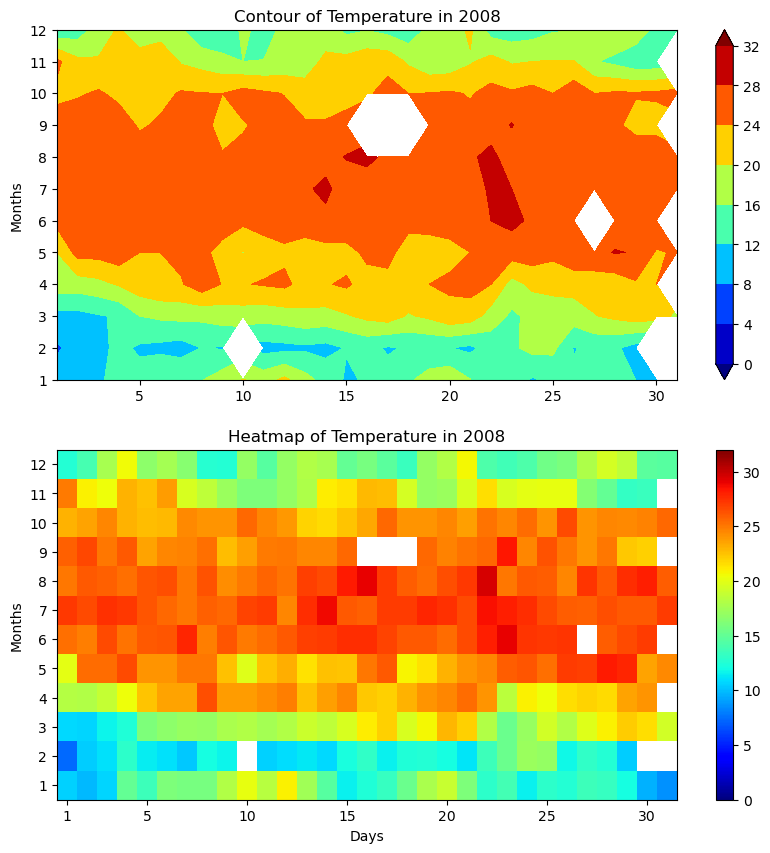

In [6]:
days = np.arange(1,32) # create array days
months = np.arange(1,13) # create array month
X, Y = np.meshgrid(days, months)

fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(2,1,1)
ax.set_title('Contour of Temperature in 2008')
bounds = np.arange(0, 33)
levels = np.linspace(0, 32, 9)
fig.colorbar(plt.contourf(X, Y, df_drop, cmap='jet', levels=levels, extend='both'))
plt.ylabel('Months')
plt.yticks(np.arange(1,13))

ax = fig.add_subplot(2,1,2)
plt.title('Heatmap of Temperature in 2008')
plt.pcolormesh(X, Y, df_drop, cmap='jet', vmin=0, vmax=32)
plt.colorbar()
plt.xlabel('Days')
plt.xticks([1, 5, 10, 15, 20, 25, 30])
plt.ylabel('Months')
plt.yticks(np.arange(1,13))

plt.show()

3. Radar chart

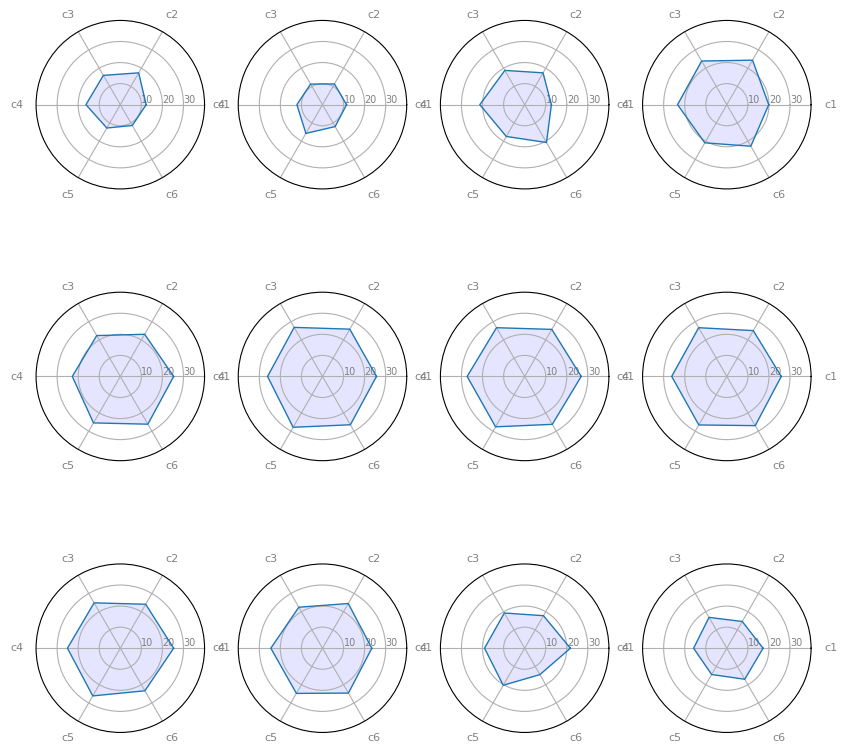

In [20]:
X = []
for i in range(len(months)):
        six_month = []
        six_month.append(np.nanmean(df_drop[i][1:5]))
        six_month.append(np.nanmean(df_drop[i][6:10]))
        six_month.append(np.nanmean(df_drop[i][11:15]))
        six_month.append(np.nanmean(df_drop[i][16:20]))
        six_month.append(np.nanmean(df_drop[i][21:25]))
        six_month.append(np.nanmean(df_drop[i][26:]))
        X.append(six_month)
X = np.array(X)

no_category = np.size(X, 1)

fig = plt.figure(figsize=(10, 10))
for i in range(12):
        ax = plt.subplot(3, 4, i+1, polar=True)

        angles = [n / float(no_category) * 2 * pi for n in range(no_category)]
        angles += angles[:1]

        plt.xticks(angles[:-1], ['c1', 'c2', 'c3', 'c4', 'c5', 'c6'], color='grey', size=8)

        # Draw ylabels
        ax.set_rlabel_position(0)
        plt.yticks([10,20,30], ["10","20","30"], color="grey", size=7)
        plt.ylim(0,40)

        # Plot data
        toto = np.concatenate((X[i,:], X[i,:1]))

        ax.plot(angles, toto , linewidth=1, linestyle='solid')

        # Fill area
        ax.fill(angles, toto, 'b', alpha=0.1)
plt.show()

4. Dendrogram

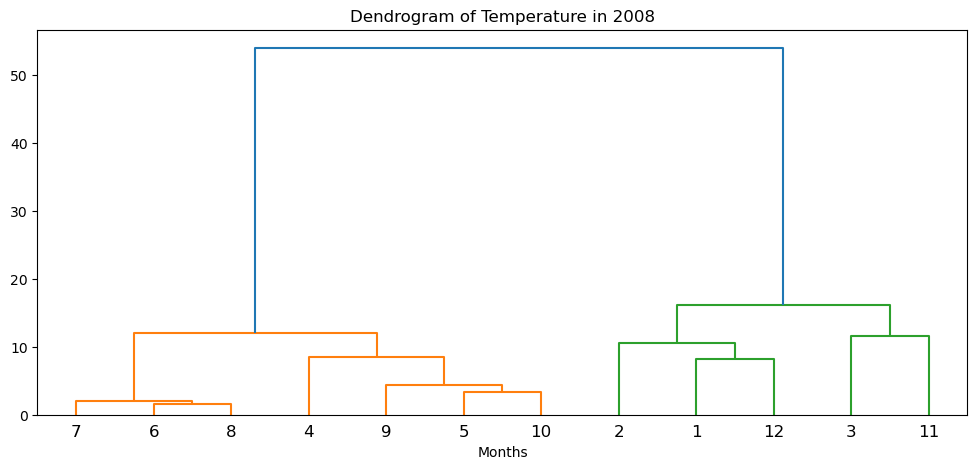

In [21]:
plt.figure(figsize=(12, 5))
Z = linkage(X, 'ward')
dendrogram = dendrogram(Z,labels= months)
plt.title('Dendrogram of Temperature in 2008')
plt.xlabel('Months')
plt.show()